# ST2195 Coursework Project - Part 1 

PART 1  A)

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Note : xstar will be used instead of x* in code cells

In [2]:
#Defining the probability density function f(x)
def f(x):
    return 0.5 * np.exp(-np.abs(x))

In [3]:
#Choosing an initial value 'x0', a positive integer 'N', and a positive real number 's'.
x0 = 0
N = 10000
s = 1

In [4]:
#Creating a list to store generated samples, starting with the initial value x0.
generated_samples = [x0]

In [5]:
#Mean (xi-1) = generated_samples[-1]
#Standard deviation = s
#Now we generate a random number x* with Mean (xi-1) and Standard Deviation s, for i=1,...,N
for i in range(1, N+1):
    xstar = np.random.normal(generated_samples[-1], s)
    
    r = f(xstar) / f(generated_samples[-1]) #Calculating the ratio r(x*, xi−1) = f(x*) / f(xi−1)
    log_r = np.log(f(xstar)) - np.log(f(generated_samples[-1])) #Taking log r to avoid numerical errors
    
    #Now we generate a random number u from the uniform distribution between 0 and 1
    u = np.random.uniform(0, 1)
    log_u = np.log(u) #Taking log u
    #If log u < log r, accept xi = x*, else set xi = x1 -1
    if log_u < log_r:
        generated_samples.append(xstar)
    else:
        generated_samples.append(generated_samples[-1])


C:\Users\bhagy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhagy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


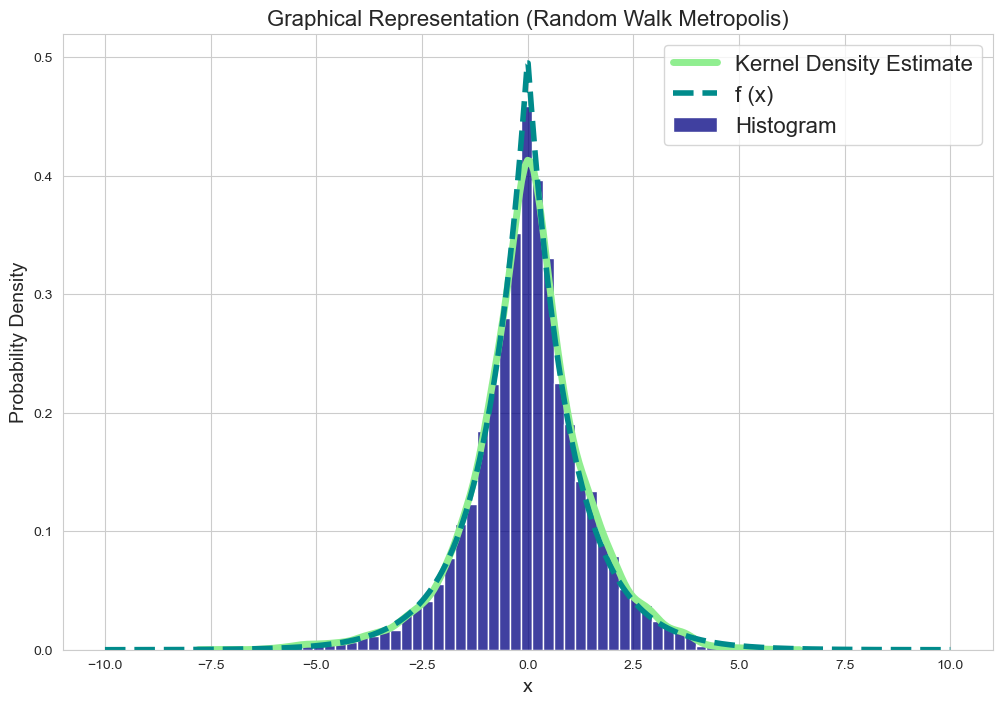

In [6]:
#Graphical Representation
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

#Plotting the histogram
sns.histplot(generated_samples, bins=50, color='navy', label='Histogram', stat='density')

#Plotting the KDE plot
sns.kdeplot(generated_samples, color='lightgreen', label='Kernel Density Estimate', linewidth=5)
plt.title('Graphical Representation (Random Walk Metropolis)', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)

#Creating a list of x values that are evenly spaced within -10 and 10 for the f(x) graph
x_list = np.linspace(-10, 10, 1000)

#Plotting the f(x) graph
plt.plot(x_list, f(x_list), color='darkcyan', label='f (x)', linewidth=4, linestyle='--')

plt.legend(fontsize=16)
plt.show()

In [7]:
#Obtaining the Monte Carlo estimates of the mean and standard deviation
SampleMean = np.mean(generated_samples)
SampleStandardDeviation = np.std(generated_samples)

In [8]:
#Displaying the sample mean and sample deviation
print(f'Sample Mean = {SampleMean}')
print(f'Sample Standard Deviation = {SampleStandardDeviation}')

Sample Mean = 0.013689568713384767
Sample Standard Deviation = 1.3732914135625311


---